# Using the GLM to Model fMRI Data
We have now seen how to use the GLM as a tool to analyse non-imaging data. Now we need to take what we have learned so far and apply it to fMRI data. Remember from previous lessons that the primary data of interest is the fMRI time series at each voxel. In the context of the GLM, the time series from a single voxel forms the outcome vector $\mathbf{Y}$. The approach is then to loop through every voxel in the image, estimating the GLM for each time series separately. This is known as the *mass-univariate* framework.

## The Mass-univariate Framework
The mass-univariate approach to modelling fMRI data was first introduced by [Fristion *et al.* (1994)](https://onlinelibrary.wiley.com/doi/abs/10.1002/hbm.460020402). In brief, we build a *single* design matrix $\mathbf{X}$ of predictors that code for changes in signal based on the timing of the experimental stimuli. We then use $\mathbf{X}$ to estimate the GLM at each voxel separately. For voxel $\nu$, the model is therefore

$$
\mathbf{Y}_{\nu} = \mathbf{X}\boldsymbol{\beta}_{\nu} + \boldsymbol{\epsilon}_{\nu}
$$

Notice that the outcome variable $\left(\mathbf{Y}_{\nu}\right)$, parameters $\left(\boldsymbol{\beta}_{\nu}\right)$ and errors $\left(\boldsymbol{\epsilon}_{\nu}\right)$ are unique to voxel $\nu$, but that the design matrix $\left(\mathbf{X}\right)$ is the *same* across all voxels. After fitting the model at every voxel, we will have as many $\boldsymbol{\beta}$ vectors and $\boldsymbol{\epsilon}$ vectors as there are voxels. These values can be saved to images, as illustrated in {numref}`param-img-fig`. Thinking back to how we interpret the GLM parameters, an image of estimates associated with a *continuous* predictor variable will indicate the magnitude of a *regression slope* at each voxel. Similarly, an image of estimates associated with a *categorical* predictor variable will indicate the magnitude of a *mean difference* at each voxel. In both cases, brighter voxels mean larger estimates and darker voxels mean smaller estimates. Importantly, because these estimates can be positive or negative, those regions that are *darkest* or *brightest* are of most interest. Even before performing any sort of inferential procedure, notice how these images show interesting regional effects associated with the predictor variables.

```{figure} images/param-images.png
---
width: 800px
name: param-img-fig
---
Illustration of how the parameter estimates from a mass-univariate GLM can be saved to images.
```

## Creating Predictors for the Time Series
As indicated above, the mass-univariate approach depends upon forming a single design matrix that can be used at each voxel to predict changes in the BOLD signal associated with the experimental stimuli. The easiest approach to code such changes is to specify a dummy variable, where a value of 1 indicates the presence of an experimental stimulus and a value of 0 indicates its absence. To make this clear, imagine a simple finger tapping experiment where the subject taps their fingers for 5 seconds and then rests for 5 seconds. To code this pattern as a dummy variable, we use a value of 0 to represent periods of rest and a value of 1 to indicate periods of tapping. Any region of the brain that follows this on-off pattern is assumed to be involved in the action of finger tapping. For instance, consider the illustration in {numref}`timeseries-dummy-fig`. This shows a time series from the motor cortex on the left and a dummy variable for the tapping conditions on the right.

```{figure} images/time-series-and-dummy.png
---
width: 800px
name: timeseries-dummy-fig
---
Illustration of how a dummy variable can code the on-off pattern of the stimulus presentation..
```

In terms of the GLM, the design matrix for this form of model would contains a columns of 1's for the intercept and then the dummy variable coding which elements of the time series were measured during rest and which elements were measured during tapping. For instance, if the subject repeated the 5 seconds of tapping twice and we used TR = 1, the model would have the form

$$
\begin{bmatrix}
y_{1}  \\
y_{2}  \\
y_{3}  \\
y_{4}  \\
y_{5}  \\
y_{6}  \\
y_{7}  \\
y_{8}  \\
y_{9}  \\
y_{10} \\
y_{11} \\
y_{12} \\
y_{13} \\
y_{14} \\
y_{15} \\
y_{16} \\
y_{17} \\
y_{18} \\
y_{19} \\
y_{20}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 1 \\
1 & 1 \\
1 & 1 \\
1 & 1 \\
1 & 1 \\
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 1 \\
1 & 1 \\
1 & 1 \\
1 & 1 \\
1 & 1
\end{bmatrix}
\begin{bmatrix}
\beta_{0} \\
\beta_{1}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{1}  \\
\epsilon_{2}  \\
\epsilon_{3}  \\
\epsilon_{4}  \\
\epsilon_{5}  \\
\epsilon_{6}  \\
\epsilon_{7}  \\
\epsilon_{8}  \\
\epsilon_{9}  \\
\epsilon_{10} \\
\epsilon_{11} \\
\epsilon_{12} \\
\epsilon_{13} \\
\epsilon_{14} \\
\epsilon_{15} \\
\epsilon_{16} \\
\epsilon_{17} \\
\epsilon_{18} \\
\epsilon_{19} \\
\epsilon_{20}
\end{bmatrix}
$$

In terms of interpreting the parameters, we know that a dummy variable will produce a parameter estimate that can be interpreted as the *mean difference* between the categories. When applied to fMRI data, the parameter estimate will tell us the average difference in the BOLD signal between the rest condition and the tapping conditions. The image of estimates for $\beta_{1}$ will therefore indicate where in the brain the largest signal change occurred between rest and tapping. The value of $\beta_{0}$ will therefore be the average signal during the rest condition. The average value of the BOLD signal during the tapping condition is then given by $\beta_{0} + \beta_{1}$, as illustrated in {numref}`dummy-interp-fig`.

```{figure} images/dummy-interp.png
---
width: 550px
name: dummy-interp-fig
---
Illustration of interpreting the parameter values from a dummy variable model.
```

## Visualising the Design Matrix
As already indicated, the design matrix is a very important part of the GLM. Not only is it the only element of the GLM equation that is constant across voxels, but it also encodes our predictions about what we expect to see in regions of the brain that are responding to the experimental manipulation. Knowing the structure of the design matrix is therefore essential to being able to interpret the parameter estimates. Because of this, SPM take the unique step of *drawing* the design matrix as a means of summarising the model. An example of this is given in {numref}`X-example-fig`. Solid blocks of colour represent dummy variables whereas those columns with a gradient represent continuous variables.

```{figure} images/X-example.jpg
---
width: 700px
name: X-example-fig
---
Example of the design matrix visualisation produced by SPM.
```

We can see the same effect by using the `imagesc` function in MATLAB with the design matrix from the previous example.

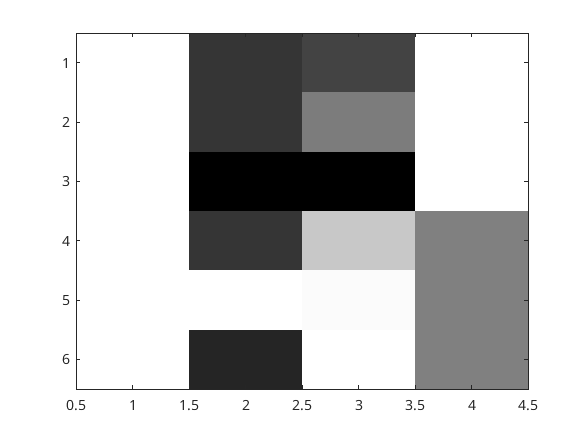

In [1]:
Xi = [1     1     1     1     1     1;     ...
      110   110   93    110   175   105;   ...
      2.620 2.875 2.320 3.215 3.440 3.460; ...
      1     1     1     0     0     0]';

Xi(:,2) = rescale(Xi(:,2),-1,1); % Scale horsepower into [-1 1]
Xi(:,3) = rescale(Xi(:,3),-1,1); % Scale weight into [-1 1]

imagesc(Xi); colormap('gray');

## Time Series and Regression Perspectives
Compared to when we were applying the GLM to non-imaging data, one of the additional complications of time series data is that it has a natural ordering based upon when each data point was collected. This means there are *two* complimentary perspectives we can use for understanding the model. In the *time series perspective*, we view the data in its natural ordering with time on the $x$-axis and intensity on the $y$-axis. From this perspective, we can see gross changes in the shape of the signal over time. Superimposing the model prediction allows visualising of when the predicted signal change corresponds to a change in the raw data. This is shown in the *left* column of {numref}`ts-reg-fig`. As an alternative, the *regression perspective* involves visualising the model as a typical multiple regression problem. When plotted, the value of the predictor variable is given on the $x$-axis, with intensity on the $y$-axis. For a dummy variable, the $x$-axis will correspond to values of only 1 or 0, resulting in a bisection of the data into those values measured during one experimental condition and those measured during the other. From this perspective, superimposing the model prediction means drawing the regression line between the two categories of data, as shown in the *right* column of {numref}`ts-reg-fig`.

```{figure} images/ts-reg-persp.png
---
width: 800px
name: ts-reg-fig
---
Example of both the time series perspective (*left*) and regression perspective (*right*) on the model fit from the GLM. This is shown for both a voxel with a strong signal change (*top*) and a voxel with a weak signal change (*bottom*). As we can see, the magnitude of the regression slope corresponds to the magnitude of signal change from one condition to another. In the time series perspective, this can be seen as the *height* of the signal change during periods associated with each condition.
```

## Inference
At this point, it would be natural to try implementing the same inferential procedure we saw earlier, using the mass-univariate framework. This would involve converting each parameter estimate to a *t*-statistic by dividing by its respective standard error. This would produce several *images* of *t*-statistics and associated *p*-values, allowing us to discern which voxels are associated with significant effects. Unfortunately, there are a number of complications with this approach that are beyond the scope of this lesson. As such, we will be leaving the process of statistical inference using images until next week. Furthermore, there are a number of issues with the methods outlined in this section that require correction before we can consider performing inference on the results of the mass-univariate GLM.